# **Instalações e Bibliotecas**

In [ ]:
# Primeiros exemplos

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **O algoritmo Naive Bayes**

**Teorema de Bayes**

\begin{equation}
P(Label \vert Feature) = \frac{P(Feature \vert Label)P(Label)}{P(Feature)}
\end{equation}

**Teorema de Bayes aplicado a linguagem natural**

Para uma determinada categoria $c$, em um conjunto de categorias $\mathcal{C}$, desejamos estimar a categoria $\hat{c}$ a qual o documento $d$ pertence.


\begin{equation}
\begin{aligned}
\hat{c}= \quad & \max_{c \in \mathcal{C}}  P(c/d)\\
\end{aligned}
\end{equation}

 Utilizando Bayes:
 
 \begin{equation}
\begin{aligned}
\hat{c}= \quad & \max_{c \in \mathcal{C}}  \frac{\overbrace{P(d/c)}^{verossimilhança} \; \; \; \overbrace{P(c)}^{a priori}}{P(d)}\\
\end{aligned}
\end{equation}

 
 $p(d)$ para o conjunto de categorias $\mathcal{C}$ é constante. O documento $d$ é formado por um conjunto de *features.*


\begin{equation}
\begin{aligned}
d \rightarrow f_1,f_2,f_3, \ldots ,f_n 
\end{aligned}
\end{equation}


 Utilizando Bayes para um conjunto de "features"$\mathcal{F}$
 

 \begin{equation}
\begin{aligned}
C_{NB}= \quad & \max_{c \in \mathcal{C}}  P(c) \prod_{f \in \mathcal{F}} P(f \vert c)\\
\end{aligned}
\end{equation}
 

 O conjunto de "features" $\mathcal{F}$ pode ser representado por um conjunto de palavras $\mathcal{W}$ que representem o que desejamos capturar.

 \begin{equation}
\begin{aligned}
C_{NB}= \quad & \max_{c \in \mathcal{C}} = P(c) \prod_{i \in \mathcal{W}} P(w_i \vert c)\\
\end{aligned}
\end{equation}


No formato $\log( \;)$:
 
 \begin{equation}
\begin{aligned}
C_{NB}= \quad & \max_{c \in \mathcal{C}} \left( \log(P(c))+ \log \left( \sum_{i \in \mathcal{W}} \log(P(w_i \vert c) \right) \right)\\
\end{aligned}
\end{equation}


## **Dados sintetizados**

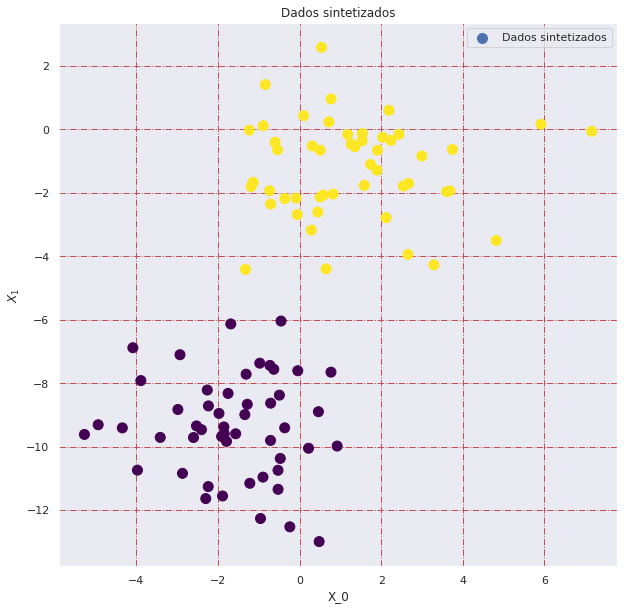

In [ ]:
from sklearn.datasets import make_blobs

# Gera dados isotrópicos com distribuição gaussiana
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

# Por que a indentificação é Gaussian? que informação isso me traz?

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig= plt.figure(figsize=(10,10))

plt.scatter(X[:, 0], X[:, 1], label="Dados sintetizados",c=y, s=100, cmap='viridis');
plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Dados sintetizados")
plt.ylabel("$X_1$")
plt.xlabel("X_0")
plt.legend(loc='upper right')

plt.show()

## **Treinamento**

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Por que a indentificação é Gaussian? que informação isso me traz?

# http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

model = GaussianNB()
model.fit(X, y);

## **Visualização**

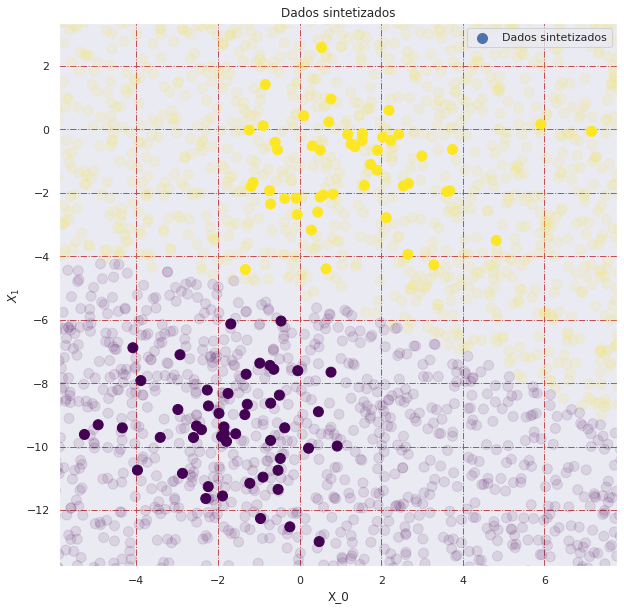

In [ ]:
# gerando uma massa de dados para visualizarmos o corte do algoritmo de classificação

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

# Visualização

fig= plt.figure(figsize=(10,10))

plt.scatter(X[:, 0], X[:, 1], label="Dados sintetizados",c=y, s=100, cmap='viridis');
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=100, cmap='viridis', alpha=0.1)
plt.axis(lim);

plt.grid(color='r', linestyle='-.', linewidth=1)

plt.title("Dados sintetizados")
plt.ylabel("$X_1$")
plt.xlabel("$X_0$")
plt.legend(loc='upper right')

plt.show()


Probablidade posterior para os *Labels* 

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

# **Análise de mensagens e temas**

## **Dados**

In [1]:
from sklearn.datasets import fetch_20newsgroups

# Carrega os dados para  
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

**Categorias**

In [ ]:
# Separando algumas categorias

categorias = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']

# criando as variáveis de treino e teste
              
treino      = fetch_20newsgroups(subset='train', categories=categorias)
teste       = fetch_20newsgroups(subset='test', categories=categorias)

In [ ]:
# Visualizando o tipo de dado

print(treino.data[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

**Criando o modelo**

In [ ]:
# Criando um modelo com multiplas categorias e vetorizado - estrutura com pipeline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a
# https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

**Treinamento e teste**

In [ ]:
model.fit(treino.data, treino.target)
labels = model.predict(teste.data)

**Matriz de confusão**

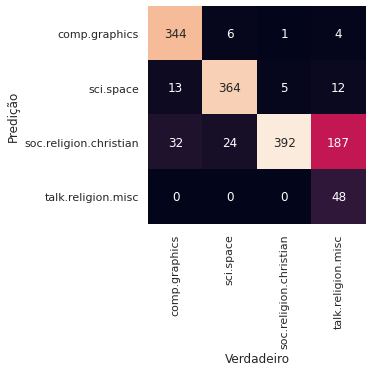

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(teste.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=treino.target_names, yticklabels=treino.target_names)
plt.xlabel('Verdadeiro')
plt.ylabel('Predição');

In [ ]:
def predict_category(s, train=treino, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('Nasa')

'sci.space'

In [2]:
predict_category('Vaticano revolution')

NameError: ignored

**Principais métricas**

In [ ]:
from sklearn import metrics

# https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

print(metrics.classification_report(teste.target, labels))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       389
           1       0.92      0.92      0.92       394
           2       0.62      0.98      0.76       398
           3       1.00      0.19      0.32       251

    accuracy                           0.80      1432
   macro avg       0.88      0.75      0.73      1432
weighted avg       0.86      0.80      0.77      1432



# **Referências**

https://web.stanford.edu/~jurafsky/slp3/4.pdf

https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html

https://mregresion.files.wordpress.com/2012/08/agresti-introduction-to-categorical-data.pdf

https://chalmers.instructure.com/courses/4086/assignments/syllabus

http://www.leg.ufpr.br/~eferreira/CE064/work5.html#conjunto-de-dados

https://dzone.com/articles/naive-bayes-tutorial-naive-bayes-classifier-in-pyt